In [1]:
""" Imports """

import numpy as np
import random as rnd
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Tabular TD(0) for estimating $v_π$

Todo: Example 6.2 statistics

In [89]:
state_space = list(range(-3, 4))
action_space = [-1, 1]
reward_space = {0:  -1, len(state_space) -1: 1}
state_values = np.zeros(len(state_space))

is_legal = lambda s: s >= 0 and s < len(state_space)
def policy(state:int, eps=0.5) -> int:
    if 1-eps < rnd.random(): return rnd.choice(list(action_space))
    return action_space[np.argmax([state_values[state + a] for a in action_space if is_legal(state + a)])]

def get_reward(state:int) -> int:
    return 0 if state not in list(reward_space) else reward_space[state]

In [90]:
""" Chickity-check yo self before you wreck yo self """

print("State_space:", state_space)
print("Action_space:", action_space)
print("Reward_space:", reward_space)
print("State_values:", state_values)

State_space: [-3, -2, -1, 0, 1, 2, 3]
Action_space: [-1, 1]
Reward_space: {0: -1, 6: 1}
State_values: [0. 0. 0. 0. 0. 0. 0.]


In [96]:
alpha = 2e-3
gamma = 1

for episode in range(int(1e4)):
    state = state_space.index(0)
    while True:          
        action = policy(state)
        next_s = state + action if is_legal(state + action) else state
        reward = get_reward(next_s)
        
        state_values[state] += alpha * (reward + gamma*state_values[next_s] - state_values[state])
        
        if state in list(reward_space): break
        state = next_s
        
print("State-values: ", [round(val, 5) for val in state_values])

State-values:  [-0.53566, 2.33241, 5.86451, 7.83877, 8.84787, 9.52425, 9.2258]


**Currently accumilates massive state values over time, properly converges with $\gamma < 1$**

In [93]:
state = state_space.index(0)

while state not in list(reward_space):
    action = policy(state, 0)
    next_s = state + action
    reward = get_reward(next_s)
    
    print({
        "State": state,
        "Action": action, 
        "Reward": reward,
        "Next state": next_s
    })
    
    state = next_s

{'State': 3, 'Action': 1, 'Reward': 0, 'Next state': 4}
{'State': 4, 'Action': 1, 'Reward': 0, 'Next state': 5}
{'State': 5, 'Action': 1, 'Reward': 1, 'Next state': 6}


**Cleaner revisioned code, closely mirrors pseudo code**

In [95]:
def step(state, action):
    next_s = state + action if is_legal(state + action) else state
    reward = get_reward(next_s)
    return next_s, reward

state_values = np.zeros(len(state_space))

for episode in range(int(1e4)):
    state = state_space.index(0)
    while state not in reward_space.keys():
        action = policy(state, eps=1)
        next_s, reward = step(state, action)
        state_values[state] += alpha * (reward + gamma * state_values[next_s] - state_values[state])
        state = next_s
        
print("State-values: ", [round(val, 5) for val in state_values])

State-values:  [0.0, -0.65922, -0.32311, -0.02587, 0.32737, 0.66922, 0.0]


# Arrow code for policy visualisation

In [153]:
arrows = {
    # RIGHT
    0: [[(0,0),(0,.4)],
        [(.1,0),(.2,.4)],
        [(-.1,0),(.2,.4)]],
    # DOWN
    1: [[(0,.4),(0,0)],
        [(.4,.2),(0,.1)],
        [(.4,.2),(0,-.1)]],
    # LEFT
    2: [[(0,0),(0,-.4)],
        [(.1,0),(-.2,-.4)],
        [(-.1,0),(-.2,-.4)]],
    # UP
    3: [[(0,-.4),(0,0)],
        [(-.4,-.2),(0,.1)],
        [(-.4,-.2),(0,-.1)]],
}

offset = lambda point, val: (point[0]+val, point[1]+val)
def draw_arrow(direction:int, position:tuple, color="r") -> None:
    x = list(map(lambda m: offset(m, position[0]), list(zip(*arrows[direction]))[0]))
    y = list(map(lambda m: offset(m, position[1]), list(zip(*arrows[direction]))[1]))
    [plt.plot(*line, c=color) for line in list(zip(y, x))]

# Sarsa (on-policy TD control) for estimating $Q=q_*$ 

$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]$

In [302]:
size_y, size_x = 7, 10
world = np.zeros((size_y, size_x))
world[3, 0], world[3, 7]  = 1, 2
cross_wind = [0,0,0,1,1,1,2,2,1,0]

action_space = {
    0: (0,1),  # RIGHT
    1: (1,0),  # DOWN
    2: (0,-1), # LEFT
    3: (-1,0)  # UP
}

direction = lambda s, a: (s[0]+a[0], s[1]+a[1])
is_legal = lambda m: (m[0]>=0 and m[0]<size_y) and (m[1]>=0 and m[1]<size_x)

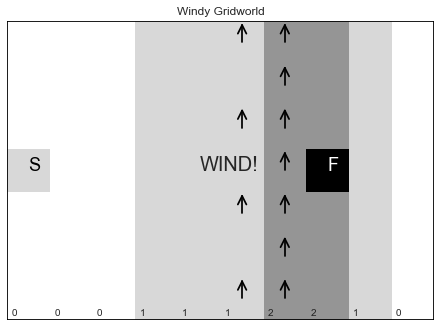

In [303]:
plt.imshow(world + np.tile(cross_wind, 7).reshape((7, -1)))
plt.title("Windy Gridworld")

plt.text(*reversed(np.where(world==1)), "S", 
         fontdict={"color":"k", "size": 18})
plt.text(*reversed(np.where(world==2)), "F", 
         fontdict={"color":"w", "size": 18})

plt.hlines(-.5,       -.5, size_x-.5, colors="k")
plt.hlines(size_y-.5, -.5, size_x-.5, colors="k")
plt.vlines(-.5,       -.5, size_y-.5, colors="k")
plt.vlines(size_x-.5, -.5, size_y-.5, colors="k")

plt.text(4,3, "WIND!", fontdict={"size":20})

[draw_arrow(3, (y, 5), color="k") for y in range(0, size_y, 2)]
[draw_arrow(3, (y, 6), color="k") for y in range(0, size_y)]
[plt.text(x-.4, 6.4, cross_wind[x]) for x in range(0, size_x)]

plt.gca().set_axis_off()

In [304]:
def policy(Q:np.ndarray, state:tuple, eps=0.5) -> int:
    if 1-eps < rnd.random():
        return rnd.choice(list(action_space))
    return np.argmax(Q, 0)[state]

def sarsa(Q:np.ndarray, s, a, r, s_, a_) -> float:
    curr_sa, next_sa = Q[a][s], Q[a_][s_]
    return curr_sa + alpha * (r + gamma*next_sa - curr_sa)

alpha =   0.5
epsilon = 0.33
gamma =   0.9

state_action_value = np.zeros((len(action_space), size_y, size_x))

num_games = int(1e6)
for episode in range(1, num_games +1):
    state = tuple(map(int, np.where(world==1)))
    action = policy(state_action_value, state, epsilon)
    
    while state != np.where(world==2):
        move = direction(state, action_space[action])
        next_s = move if is_legal(move) else state
        next_s = (max(0, next_s[0]-cross_wind[state[1]]), next_s[1])
        reward = -1
        
        next_a = policy(state_action_value, next_s, epsilon)
        
        state_action_value[action][state] = sarsa(state_action_value,
                                                  state, action, reward, next_s, next_a)
        state, action = next_s, next_a
    
    if episode % (num_games//10) == 0:
        print(f"State-action value optimization is {episode / num_games:.0%} done.")

State-action value optimization is 10% done.
State-action value optimization is 20% done.
State-action value optimization is 30% done.
State-action value optimization is 40% done.
State-action value optimization is 50% done.
State-action value optimization is 60% done.
State-action value optimization is 70% done.
State-action value optimization is 80% done.
State-action value optimization is 90% done.
State-action value optimization is 100% done.


In [305]:
state = tuple(map(int, np.where(world==1)))
path = [state]

while state != np.where(world==2):
    action = np.argmax(state_action_value, 0)[state]
    move = direction(state, action_space[action])
    next_s = move if is_legal(move) else state
    next_s = (max(0, next_s[0]-cross_wind[state[1]]), next_s[1])
    
    state = next_s
    path.append(state)

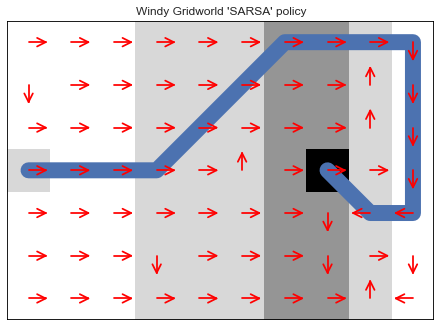

In [308]:
plt.imshow(world + np.tile(cross_wind, 7).reshape((7, -1)))
plt.title("Windy Gridworld 'SARSA' policy")

plt.hlines(-.5,       -.5, size_x-.5, colors="k")
plt.hlines(size_y-.5, -.5, size_x-.5, colors="k")
plt.vlines(-.5,       -.5, size_y-.5, colors="k")
plt.vlines(size_x-.5, -.5, size_y-.5, colors="k")

plt.plot(*reversed(list(zip(*path))), lw=16)

for (y, x), val in np.ndenumerate(np.argmax(state_action_value, 0)):
    draw_arrow(val, (y, x))
    
plt.gca().set_axis_off()

# Cliff Walking world 

In [333]:
size_y, size_x = 4, 10
world = np.zeros((size_y, size_x))
world[3, 0], world[3, 9]  = 1, 2
world[3, 1:-1] = -1

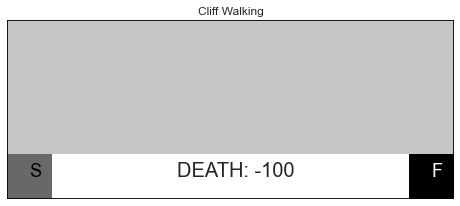

In [334]:
plt.imshow(world)
plt.title("Cliff Walking")
plt.text(*reversed(np.where(world==1)), "S", 
         fontdict={"color":"k", "size": 18})
plt.text(*reversed(np.where(world==2)), "F", 
         fontdict={"color":"w", "size": 18})

plt.hlines(-.5,       -.5, size_x-.5, colors="k")
plt.hlines(size_y-.5, -.5, size_x-.5, colors="k")
plt.vlines(-.5,       -.5, size_y-.5, colors="k")
plt.vlines(size_x-.5, -.5, size_y-.5, colors="k")

plt.text(3.3, 3, "DEATH: -100", fontdict={"size":20})

plt.gca().set_axis_off()

# Q-learning: Off-policy TD Control

In [251]:
def q_learning(Q, s, a, r, s_) -> float:
    curr_sa = Q[a][s]
    max_a = max(Q[a_][s_] for a_ in action_space)
    
    return curr_sa + alpha * (r + (gamma*max_a) - curr_sa)

$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma max_a Q(S_{t+1}, a) - Q(S_t, A_t)]$

In [224]:
alpha =   0.5
epsilon = 0.33
gamma =   0.9

state_action_value = np.random.random((len(action_space), size_y, size_x))
for a in range(4): state_action_value[a][np.where(world==2)] = 0
    
num_games = int(1e5)
for episode in range(1, num_games +1):
    state = tuple(map(int, np.where(world==1)))
    
    while state != np.where(world==2):
        action = policy(state_action_value, state, epsilon)
        move = direction(state, action_space[action])
        next_s = move if is_legal(move) else state
        
        if next_s in [(3, x) for x in range(1, 9)]:
            reward = -100
            next_s = tuple(map(int, np.where(world==1)))
        else:
            reward = -1
        
        state_action_value[action][state] = q_learning(state_action_value,
                                                       state, action, reward, next_s)
        state = next_s
        
    if episode % (num_games//10) == 0:
        print(f"State-action value optimization is {episode / num_games:.0%} done.")

State-action value optimization is 10% done.
State-action value optimization is 20% done.
State-action value optimization is 30% done.
State-action value optimization is 40% done.
State-action value optimization is 50% done.
State-action value optimization is 60% done.
State-action value optimization is 70% done.
State-action value optimization is 80% done.
State-action value optimization is 90% done.
State-action value optimization is 100% done.


In [225]:
state = tuple(map(int, np.where(world==1)))
path = [state]

while state != np.where(world==2):
    action = np.argmax(state_action_value, 0)[state]
    move = direction(state, action_space[action])
    next_s = move if is_legal(move) else state
    if next_s in [(3, x) for x in range(1, 9)]:
        next_s = tuple(map(int, np.where(world==1)))
        
    state = next_s
    path.append(state)

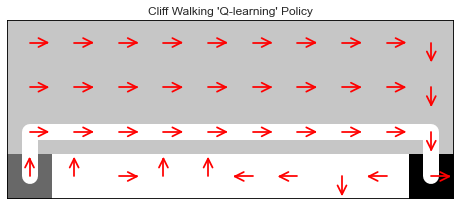

In [226]:
plt.imshow(world)
plt.title("Cliff Walking 'Q-learning' Policy")

plt.hlines(-.5,       -.5, size_x-.5, colors="k")
plt.hlines(size_y-.5, -.5, size_x-.5, colors="k")
plt.vlines(-.5,       -.5, size_y-.5, colors="k")
plt.vlines(size_x-.5, -.5, size_y-.5, colors="k")

plt.plot(*reversed(list(zip(*path))), lw=16)

for (y, x), val in np.ndenumerate(np.argmax(state_action_value, 0)):
    draw_arrow(val, (y, x))

plt.gca().set_axis_off()

### Q-learning agent likes to live on the edge, let's see how SARSA plans to reach the exit.

In [297]:
alpha =   0.5
epsilon = 0.33
gamma =   0.9

state_action_value = np.zeros((len(action_space), size_y, size_x))

num_games = int(1e6)
for episode in range(1, num_games +1):
    state = tuple(map(int, np.where(world==1)))
    action = policy(state_action_value, state, epsilon)
    
    while state != np.where(world==2):
        move = direction(state, action_space[action])
        next_s = move if is_legal(move) else state
        
        if next_s in [(3, x) for x in range(1, 9)]:
            next_s = tuple(map(int, np.where(world==1)))
            reward = -100
        else:
            reward = -1
        
        next_a = policy(state_action_value, next_s, epsilon)
        
        state_action_value[action][state] = sarsa(state_action_value,
                                                  state, action, reward, next_s, next_a)
        state, action = next_s, next_a
    
    if episode % (num_games//10) == 0:
        print(f"State-action value optimization is {episode / num_games:.0%} done.")

State-action value optimization is 10% done.
State-action value optimization is 20% done.
State-action value optimization is 30% done.
State-action value optimization is 40% done.
State-action value optimization is 50% done.
State-action value optimization is 60% done.
State-action value optimization is 70% done.
State-action value optimization is 80% done.
State-action value optimization is 90% done.
State-action value optimization is 100% done.


In [300]:
state = tuple(map(int, np.where(world==1)))
path = [state]

while state != np.where(world==2):
    action = np.argmax(state_action_value, 0)[state]
    move = direction(state, action_space[action])
    next_s = move if is_legal(move) else state
    if next_s in [(3, x) for x in range(1, 9)]:
        next_s = tuple(map(int, np.where(world==1)))
        
    state = next_s
    path.append(state)

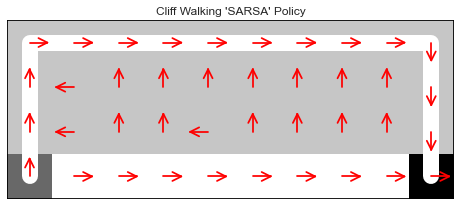

In [301]:
plt.imshow(world)
plt.title("Cliff Walking 'SARSA' Policy")

plt.hlines(-.5,       -.5, size_x-.5, colors="k")
plt.hlines(size_y-.5, -.5, size_x-.5, colors="k")
plt.vlines(-.5,       -.5, size_y-.5, colors="k")
plt.vlines(size_x-.5, -.5, size_y-.5, colors="k")

plt.plot(*reversed(list(zip(*path))), lw=16)

for (y, x), val in np.ndenumerate(np.argmax(state_action_value, 0)):
    draw_arrow(val, (y, x))

plt.gca().set_axis_off()

### Although Q-learning agent optimises a lot faster than SARSA, 
### in this Cliff Walking example, SARSA doesn't risk the heavy penalty for falling off.

# Double Q-learning, for estimating $Q_1 \approx Q_2 \approx q*$

$Q_1(S_t, A_t) \leftarrow Q_1(S_t, A_t) + \alpha[R_{t+1} + \gamma Q_2(S_{t+1}, argmax_a Q_1(S_{t+1}, a))) - Q_1(S_t, A_t))]$

$Q_2(S_t, A_t) \leftarrow Q_2(S_t, A_t) + \alpha[R_{t+1} + \gamma Q_1(S_{t+1}, argmax_a Q_2(S_{t+1}, a))) - Q_2(S_t, A_t))]$

In [335]:
def double_q_learning(Q_1, Q_2 , s, a, r, s_) -> float:
    curr_sa = Q_1[a][s]
    a_ = np.argmax(Q_1, 0)[s_]
    next_sa = Q_2[a_][s_]
    
    return curr_sa + alpha * (r + (gamma*next_sa) - curr_sa)

In [336]:
alpha =   0.5
epsilon = 0.33
gamma =   0.9

state_action_value_1 = np.zeros((len(action_space), size_y, size_x))
state_action_value_2 = np.zeros((len(action_space), size_y, size_x))
    
num_games = int(1e4)
for episode in range(1, num_games +1):
    state = tuple(map(int, np.where(world==1)))
    
    while state != np.where(world==2):
        action = policy(state_action_value_1 + state_action_value_2, state, epsilon)
        move = direction(state, action_space[action])
        next_s = move if is_legal(move) else state
        
        if next_s in [(3, x) for x in range(1, 9)]:
            reward = -100
            next_s = tuple(map(int, np.where(world==1)))
        else:
            reward = -1
            
        if rnd.random() > 0.5:
            state_action_value_1[action][state] = double_q_learning(
                state_action_value_1, state_action_value_2, 
                state, action, reward, next_s
            )
        else:
            state_action_value_2[action][state] = double_q_learning(
                state_action_value_2, state_action_value_1, 
                state, action, reward, next_s
            )
            
        state = next_s
        
    if episode % (num_games//10) == 0:
        print(f"State-action value optimization is {episode//(num_games//100)}% done.")

State-action value optimization is 10% done.
State-action value optimization is 20% done.
State-action value optimization is 30% done.
State-action value optimization is 40% done.
State-action value optimization is 50% done.
State-action value optimization is 60% done.
State-action value optimization is 70% done.
State-action value optimization is 80% done.
State-action value optimization is 90% done.
State-action value optimization is 100% done.


In [337]:
state = tuple(map(int, np.where(world==1)))
path = [state]

while state != np.where(world==2):
    action = np.argmax(state_action_value_1 + state_action_value_2, 0)[state]
    move = direction(state, action_space[action])
    next_s = move if is_legal(move) else state
    if next_s in [(3, x) for x in range(1, 9)]:
        next_s = tuple(map(int, np.where(world==1)))
        
    state = next_s
    path.append(state)

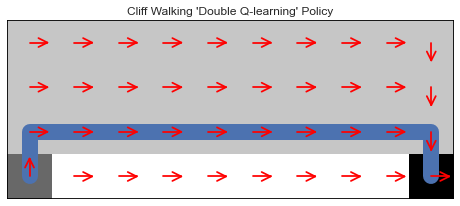

In [340]:
plt.imshow(world)
plt.title("Cliff Walking 'Double Q-learning' Policy")

plt.hlines(-.5,       -.5, size_x-.5, colors="k")
plt.hlines(size_y-.5, -.5, size_x-.5, colors="k")
plt.vlines(-.5,       -.5, size_y-.5, colors="k")
plt.vlines(size_x-.5, -.5, size_y-.5, colors="k")

plt.plot(*reversed(list(zip(*path))), lw=16)

for (y, x), val in np.ndenumerate(np.argmax(state_action_value_1 + state_action_value_2, 0)):
    draw_arrow(val, (y, x))

plt.gca().set_axis_off()